In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [106]:
company_data = pd.read_csv(r'C:\Users\HP\Downloads\batch86assignments\Random Forest Project 9 & 10\10. Random Forests\Company_Data.csv')

In [107]:
df1= company_data.copy()

In [108]:
df1.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [109]:
df1.shape

(400, 11)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [111]:
df1.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


# EDA

In [112]:
df1.groupby(['US']).sum()['Sales']

C:\Users\HP\AppData\Local\Temp\ipykernel_41692\2619417015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['US']).sum()['Sales']


US
No      968.87
Yes    2029.66
Name: Sales, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_41692\1162958104.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['US']).sum()['Sales'].plot(kind='bar')


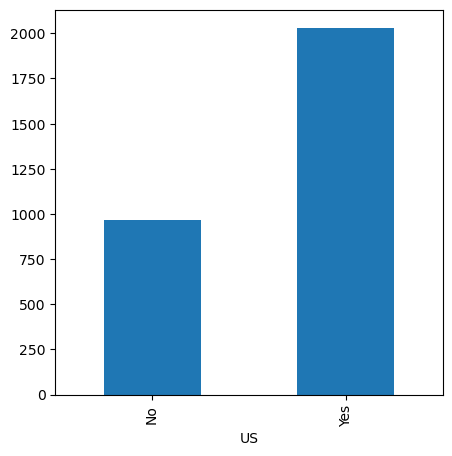

In [113]:
plt.figure(figsize = (5,5))
df1.groupby(['US']).sum()['Sales'].plot(kind='bar')
plt.show()

In [114]:
df1.groupby(['Urban']).sum()['Sales']

C:\Users\HP\AppData\Local\Temp\ipykernel_41692\2898165376.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['Urban']).sum()['Sales']


Urban
No      892.50
Yes    2106.03
Name: Sales, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_41692\179280087.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['Urban']).sum()['Sales'].plot(kind='bar')


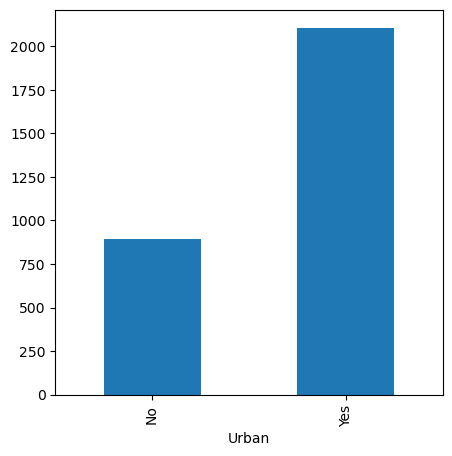

In [115]:
plt.figure(figsize = (5,5))
df1.groupby(['Urban']).sum()['Sales'].plot(kind='bar')
plt.show()

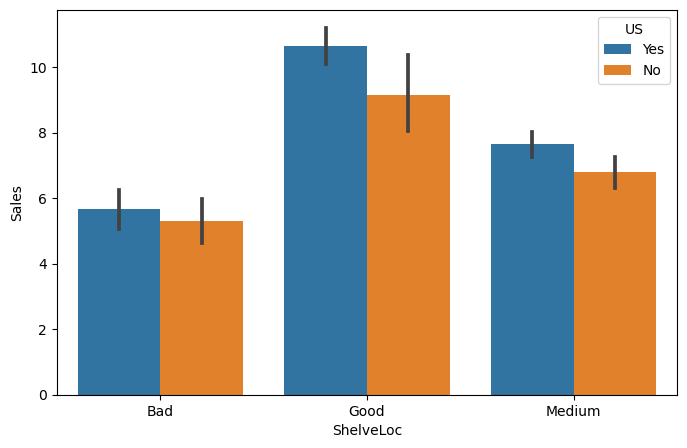

In [116]:
plt.figure(figsize = (8,5))
sns.barplot(x='ShelveLoc', y ='Sales', hue='US', data = df1)
plt.show()

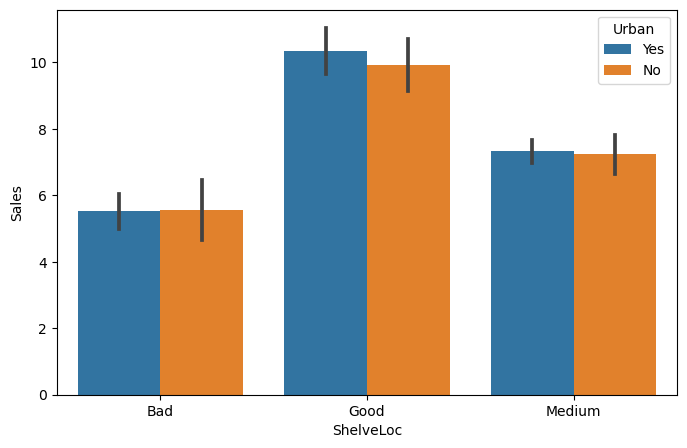

In [117]:
plt.figure(figsize = (8,5))
sns.barplot(x='ShelveLoc', y ='Sales', hue='Urban', data = df1)
plt.show()

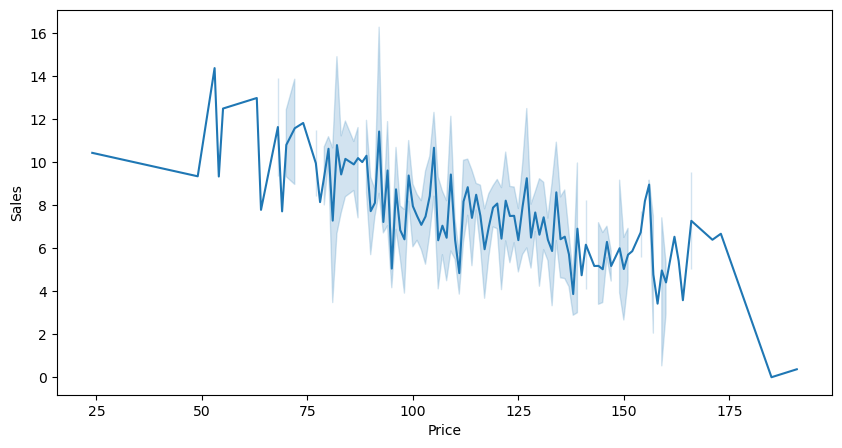

In [118]:
plt.figure(figsize = (10,5))
sns.lineplot(x='Price', y ='Sales', data = df1)
plt.show()

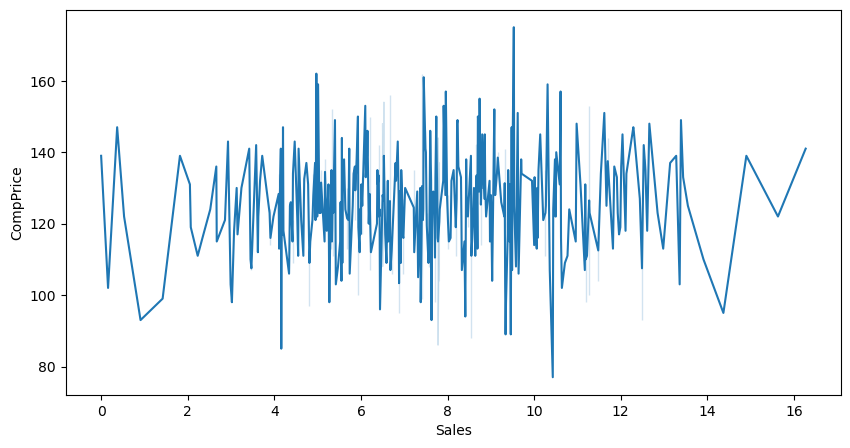

In [119]:
plt.figure(figsize = (10,5))
sns.lineplot(x='Sales', y ='CompPrice', data = df1)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_41692\3076625724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


<Axes: >

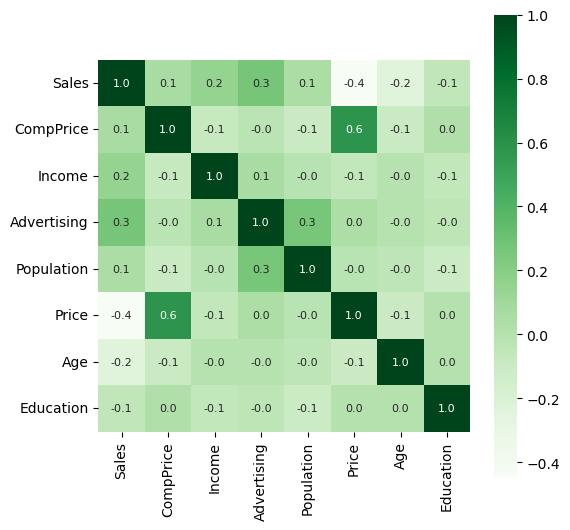

In [120]:
## Correlation 
correlation = df1.corr()
plt.figure(figsize = (6,6))
sns.heatmap(correlation, annot = True, cbar = True,square =True, annot_kws={'size':8}, fmt='.1f', cmap='Greens')

In [121]:
## Total sales in US and Urbsn areas
us_urban = df1[(df1['Urban']=='Yes') & (df1['US']=='Yes')]['Sales'].sum()
print('Total sales in US and Urban areas',us_urban )

Total sales in US and Urban areas 1434.24


In [122]:
## Total sales in non-US and non-urbsn areas
non_us_urban = df1[(df1['Urban']=='No') & (df1['US']=='No')]['Sales'].sum()
print('Total sales in non-US and non-urbsn areas',non_us_urban )

Total sales in non-US and non-urbsn areas 297.08


In [123]:
## Total advertising in US 
df1['Advertising'].sum()

2654

In [124]:
## Total advertsiement cost in US
us_adver = df1.groupby('US')['Advertising'].sum()
print('Total advertising cost in US',us_adver )

Total advertising cost in US US
No       72
Yes    2582
Name: Advertising, dtype: int64


In [125]:
## Total advertsiement cost in US
urban_adver = df1.groupby('Urban')['Advertising'].sum()
print('Total advertising cost in Urban',urban_adver )

Total advertising cost in Urban Urban
No      732
Yes    1922
Name: Advertising, dtype: int64


In [126]:
max_sales = df1[df1['Sales'].max()==df1['Sales']]
print('Maximum sales',max_sales)

Maximum sales      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
376  16.27        141      60           19         319     92      Good   44   

     Education Urban   US  
376         11   Yes  Yes  


In [127]:
min_sales = df1[df1['Sales'].min()==df1['Sales']]
print('Maximum sales',min_sales)

Maximum sales      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
174    0.0        139      24            0         358    185    Medium   79   

     Education Urban  US  
174         15    No  No  


In [128]:
## Total number of customer bwteen age 15 -40
age_x =len(df1[df1['Age'].between(15,40)])
print('Total number of customer bwteen age 15 - 40 =',age_x)

Total number of customer bwteen age 15 - 40 = 103


# DATA PROCESSING

In [129]:
## Replace Yes to 1 and No to 0
df1['Urban']=df1['Urban'].replace({'Yes':1, 'No':0})
df1['US']=df1['US'].replace({'Yes':1, 'No':0})

In [130]:
df1.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,1,1


In [131]:
df1['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [132]:
## Dummy creation of ShelveLoc
get_dummy = pd.get_dummies(df1['ShelveLoc'])

In [133]:
## Concat two dataframe
df3=pd.concat([df1,get_dummy], axis=1)
df3.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Bad,Good,Medium
0,9.50,138,73,11,276,120,Bad,42,17,1,1,1,0,0
1,11.22,111,48,16,260,83,Good,65,10,1,1,0,1,0


In [134]:
## Average sales calculation 
avr_sales = df3['Sales'].mean()
avr_sales

7.496325000000001

In [137]:
df1['Sales'].apply(lambda y_value: 1 if y_value <=7.5 else 0)

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int64

# Data spliting

In [138]:
X = df3[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban', 'US', 'Bad','Good','Medium']]
X.head(2)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Bad,Good,Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0


In [139]:
y=df3['Sales']

In [143]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [144]:
model_rf = RandomForestClassifier (criterion='entropy',max_depth =9)
train_model = model_rf.fit(X_train,y_train)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=124)
prediction =train_model.predict(X_test)
prediction

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [145]:
accu_sc = accuracy_score(prediction,y_test)
print('Accuracy of model =',accu_sc)

Accuracy of model = 0.975


# Building predictive system

In [146]:
input_info = (111,48,16,260,83,65,10,1,1,0,1,0)

In [147]:
## Change input data to numpy array 
input_info_as_numpy_array = np.asarray(input_info)

In [148]:
## Reshape the data as predicting data structure 
input_info_reshape = input_info_as_numpy_array.reshape(1,-1)
prediction = train_model.predict(input_info_reshape)

## Prediction 
print('Prediction =', prediction)

Prediction = [0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
